# Module 3- Regression & Beta Calculation



#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 3.1 
Import the file 'gold.csv', which is contains the data about last 2 years price action of Indian(MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'.

One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial fucntion of the same inputs. Also, one of the 2 columns is partially filled.

>Using linear regression, find the coefficients of the inputs and using the same trained model, complete the
      entire column.
      
>Also, try to fit the other column as well using a new linear regression model. Check if the predicitons are 
      accurate.
      Mention which column is a linear function and which is a polynomial function.
      (Hint: Plotting a histogram & distplot helps in recognizing the  discrepencies in prediction, if any.)

In [6]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# pylab is used to format the legend in plots

import pylab as plot 
params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plot.rcParams.update(params)

In [3]:
data = pd.read_csv("GOLD.csv")
data.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [4]:
data.info()
# From this it is clearly visible that the columnn which has some missing values i.e. Partially Filled is Pred 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      512 non-null    object 
 1   Price     512 non-null    int64  
 2   Open      512 non-null    int64  
 3   High      512 non-null    int64  
 4   Low       512 non-null    int64  
 5   Vol.      512 non-null    object 
 6   Change %  512 non-null    object 
 7   Pred      411 non-null    float64
 8   new       512 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 36.1+ KB


In [7]:
xdataset = data.drop(['Date','Vol.','Change %','Pred','new'],axis=1)

# Right now taking into consideration new column to check if it is Linear or Polynomial

ydataset = data['new']
xtrain,xtest,ytrain,ytest=train_test_split(xdataset,ydataset,test_size=0.3,random_state=2)


linear=LinearRegression()
linear.fit(xtrain,ytrain)
print('The coefficient for Linear Regression are',linear.coef_)
print('Assume new column is Linear So MSE is',mean_squared_error(ytest,linear.predict(xtest)))

linear1=LinearRegression()
poly=PolynomialFeatures(degree=2)
xrain=poly.fit_transform(xtrain.values)
xwhole=poly.fit_transform(xdataset.values)
#yrain=poly.fit_transform([ytrain])
linear1.fit(xrain,ytrain)
print('The coefficient for Polynomial Regression are',linear1.coef_)
#linear.predict(poly.fit_transform(xtest.values))
print('Assume new column is Polynomial So MSE is',mean_squared_error(ytest,linear1.predict(poly.fit_transform(xtest.values))))
print('Our Second Assumption has less Error Hence new Column is Polynomial')

The coefficient for Linear Regression are [ 1.01306267 -1.00039938  1.00537134 -1.01810115]
Assume new column is Linear So MSE is 0.2841148088565647
The coefficient for Polynomial Regression are [ 0.00000000e+00  1.01143585e+00 -1.00058453e+00  1.00498370e+00
 -1.01590068e+00  2.73163332e-07 -1.06766960e-06  3.26670411e-05
 -3.25170942e-05 -3.81729920e-07  6.25464412e-07  1.22690759e-06
 -1.22430358e-07 -3.32134990e-05  3.25116747e-05]
Assume new column is Polynomial So MSE is 0.00035408750824057506
Our Second Assumption has less Error Hence new Column is Polynomial


0.0003495715527131423
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


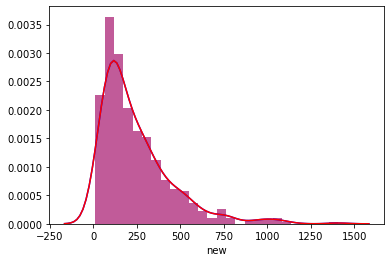

In [8]:
import warnings
warnings.simplefilter('ignore')
e = data.loc[0:410]
d = data.loc[411:512]
dcop=d.drop(['Date','Vol.','Change %','Pred','new'],axis=1)
store=linear.predict(dcop)
d['Pred']=store[0:101]
d['Pred']=round(d['Pred'])
r1=pd.concat([e,d],axis=0)

new_predict=linear1.predict(xwhole) 
# fit new column with Polynomial Features and predict on the xdataset
r1['new_predict']=new_predict
print(mean_squared_error(r1['new_predict'],r1['new']))
print(sns.distplot(r1['new_predict'],color='b',label='Pred'))
print(sns.distplot(r1['new'],color='r',label='new'))


In [5]:
data.set_index('Date')
gold_without_nan = data.dropna()
data.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


Slope: [[-0.00823083]]
Intercept: [343.67028421]
Root mean squared error:  73300.46132887459
R2 score:  3.732507600850976e-05


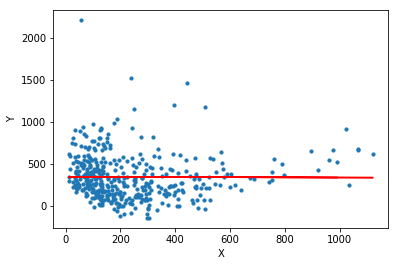

In [73]:
y = np.array(gold_without_nan["Pred"])
x = np.array(gold_without_nan["new"])
x = x.reshape(-1,1)
y = y.reshape(-1,1)

# Model initialization

regression_model = LinearRegression()

# Fit the data(Training the model)

regression_model.fit(x, y)

# Predicting

y_predicted = regression_model.predict(x)

# Model Evaluation

rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# Printing the value of the coefficients and also Showing the accuracy of the prediction

print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# Plotting Values

plt.scatter(x, y, s=10)
plt.xlabel('X')
plt.ylabel('Y')

# Predicted Values

plt.plot(x, y_predicted, color='r')
plt.show()

In [72]:
# Regression for the complete Data

pre_data = data[:]
pre_data_new = pre_data['new']
pre_data_new = pre_data_new.values.reshape(-1,1)
na_data = (regression_model.predict(pre_data_new))#Getting Predicted Values
na_data_series = pd.Series(na_data.ravel())
sata = na_data_series.to_frame()
data['Pred'] = sata
data.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,27469.839133,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,5860.905297,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,25701.733615,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,29446.878938,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,28128.025836,112.153318


Slope: [[-0.00823083]]
Intercept: [343.67028421]
Root mean squared error:  7.841339027655078e-28
R2 score:  1.0


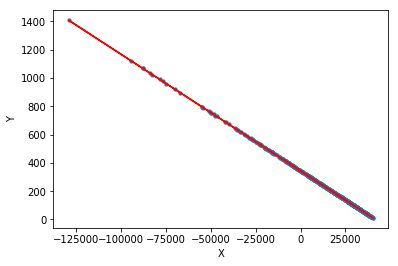

In [74]:
y = np.array(data["new"])
x = np.array(data["Pred"])
x = x.reshape(-1,1)
y = y.reshape(-1,1)

# Model initialization

regression_model = LinearRegression()

# Fit the data(train the model)

regression_model.fit(x, y)

# Predicting the values

y_predicted = regression_model.predict(x)

# Model evaluation

rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# Printing values

print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# Plotting 

plt.scatter(x, y, s=10)
plt.xlabel('X')
plt.ylabel('Y')

# Predicted values

plt.plot(x, y_predicted, color='r')
plt.show()

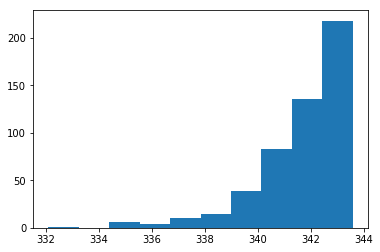

In [47]:
plt.hist(data['Pred'])
plt.show()

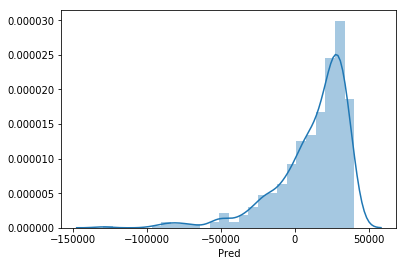

In [77]:
sns.distplot(data['Pred'])
plt.show()

The column new is the linear function as the mean squared error for it is very low whereas 
the pred column is more comaptible as a polynomial function.

QUERY 3.2

In [89]:

PNB=pd.read_csv('PNB.csv')
Nifty=pd.read_csv('Nifty50.csv')
Nifty['Date']=Nifty['Date'].astype('datetime64[ns]')
PNB['Date']=PNB['Date'].astype('datetime64[ns]')

PNB.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,PNB,EQ,2017-05-15,169.15,169.95,171.30,166.2,166.85,166.80,168.94,7476618,1.263123e+09,41641,1352589,18.09
1,PNB,EQ,2017-05-16,166.80,167.35,178.00,164.8,173.20,174.15,173.13,51532461,8.921904e+09,254027,5804867,11.26
2,PNB,EQ,2017-05-17,174.15,173.00,173.10,164.3,164.80,165.05,167.27,26536944,4.438942e+09,116512,7037498,26.52
3,PNB,EQ,2017-05-18,165.05,163.40,164.40,157.9,158.25,158.50,161.06,13905573,2.239613e+09,76746,3245443,23.34
4,PNB,EQ,2017-05-19,158.50,159.50,162.25,154.1,155.20,155.20,157.59,16311602,2.570540e+09,82394,2816963,17.27


In [88]:
nifty_data = Nifty.sort_values('Date')
Nifty.set_index('Date', inplace=True)
Nifty.head()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
2017-05-15,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
2017-05-16,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2017-05-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
2017-05-18,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
2017-05-19,9469.90,9505.75,9390.75,9427.90,259861396,11544.77


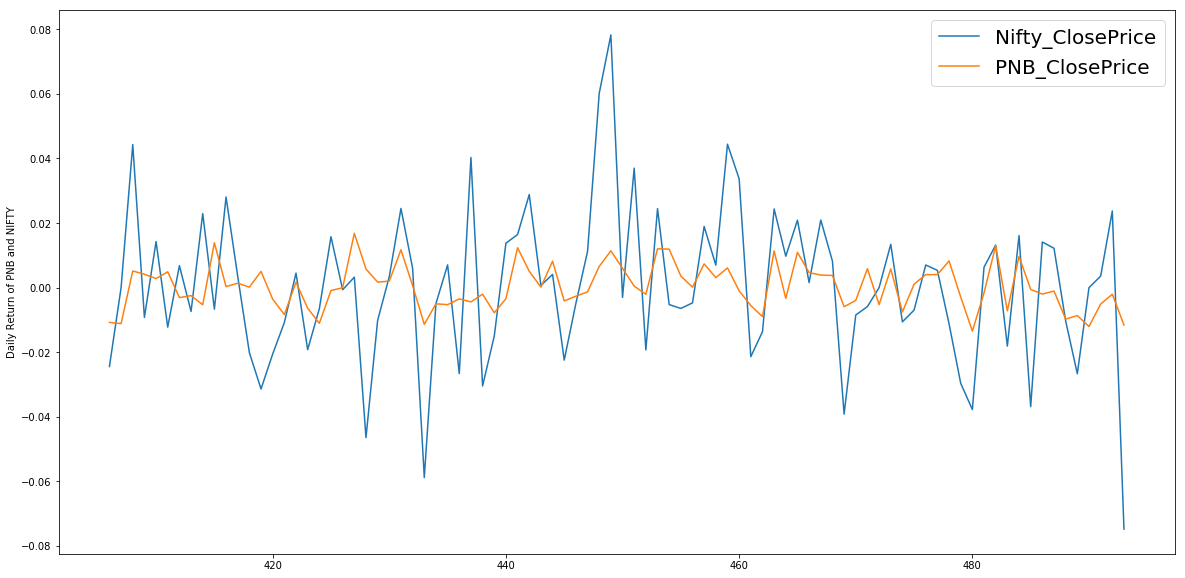

In [91]:
fil_PNB = PNB[405:]
fil_Nifty = Nifty[405:]
return_PNB = fil_PNB['Close Price'].pct_change()
return_Nifty = fil_Nifty['Close'].pct_change()
plt.figure(figsize=(20,10))
return_PNB.plot()
return_Nifty.plot()
plt.ylabel("Daily Return of PNB and NIFTY")
my_labels = {"PNB_ClosePrice","Nifty_ClosePrice"}
plt.legend(labels=my_labels)
plt.show()

In [94]:
xaxis=[]
yaxis=[]
for i in range(1,len(PNB)):
    xaxis.append((PNB['Close Price'][i]-PNB['Close Price'][i-1])/PNB['Close Price'][i-1])
    yaxis.append((Nifty['Close'][i]-Nifty['Close'][i-1])/Nifty['Close'][i-1])

l=len(PNB['Date'][PNB['Date']<('2017-8-15')])   # Data for last three months
xaxis=np.array(xaxis)
yaxis=np.array(yaxis)
xaxis=xaxis[0:l]
yaxis=yaxis[0:l]
yaxis=yaxis.reshape(-1,1)
xaxis=xaxis.reshape(-1,1)
xt,xte,yt,yte=train_test_split(xaxis,yaxis,test_size=0.2,random_state=0)
ob1=LinearRegression()
ob1.fit(xt,yt)

 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [95]:
ob1.coef_
#value is less than 1. beta of value less than 1 indicates that the security is less volatile than the market as a whole.

array([[0.1059548]])

In [98]:
PNB['Month']=PNB['Date'].dt.month
PNB['Year']=PNB['Date'].dt.year
Nifty['Month']=Nifty['Date'].dt.month
Nifty['Year']=Nifty['Date'].dt.year
MonthlyPNB=PNB.groupby([PNB['Year'],PNB['Month']]).sum()
MonthlyNifty=Nifty.groupby([Nifty['Year'],Nifty['Month']]).sum()
xa=[]
ya=[]
for i in range(1,len(MonthlyPNB)):
    xa.append((MonthlyPNB['Close Price'][i]-MonthlyPNB['Close Price'][i-1])/MonthlyPNB['Close Price'][i-1])
    ya.append((MonthlyNifty['Close'][i]-MonthlyNifty['Close'][i-1])/MonthlyNifty['Close'][i-1])
xax=np.array(xa)
yax=np.array(ya)
yax=yax.reshape(-1,1)
xax=xax.reshape(-1,1)

In [99]:
xtr,xtes,ytr,ytes=train_test_split(xax,yax,test_size=0.2,random_state=0)
ob2=LinearRegression()
ob2.fit(xtr,ytr)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [100]:
ob2.coef_
#beta value for months (months returns)

array([[0.76913476]])

With a negative beta value a inverse co relation is shown with the market value.

Increase in market value is decrease in the stock value.

Beta value were fairly below the value of 1 showing that the stocks of PNB are worth buying as the risk is not that high and a person can expect good returns from this investment.

The beta value is shown by the coefficient of the Linear Regession model or slope. The larger the value thehigher the risk. 
The value between 0 to 1 is desirable as it shows less volatility with the market

A beta that is greater than 1.0 indicates that the security's price is theoretically more volatile than the market. For example, if a stock's beta is 1.2, it is assumed to be 20% more volatile than the market.
-->A beta value of less than 1.0 means that the security is theoretically less volatile than the market, meaning the portfolio is less risky with the stock included than without it. For example, utility stocks often have low betas because they tend to move more slowly than market averages.
-->A beta of -1.0 means that the stock is inversely correlated to the market benchmark as if it were an opposite, mirror image of the benchmark’s trends.